In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

In [2]:
import sys
sys.path.insert(1, r'./../Python')
from helper import *

In [3]:
top_file = '../Input/data.txt'
csv_file = '../Results/csv/28_5_2018.csv'
cpu_csv  = '../Results/csv/28_5_2018_cpu.csv'
mem_csv  = '../Results/csv/28_5_2018_mem.csv'

In [4]:
top = load_data(top_file, csv_file)
save_as_csv(csv_file, top)

In [5]:
top.columns.levels[0]

Index(['(sd-pam)', 'DWC', 'SMIO', 'agetty', 'avahi-daemon', 'awk', 'bash',
       'cfg80211', 'cron', 'crypto', 'dbus-daemon', 'dhcpcd', 'docker-cont+',
       'docker-proxy', 'dockerd', 'dwc_otg', 'entry.sh', 'ext4-rsv-co+',
       'grep', 'ipv6_addrco+', 'iscsi_eh', 'jbd2/mmcblk+', 'kblockd',
       'kcompactd0', 'kdevtmpfs', 'khungtaskd', 'ksoftirqd/0', 'kswapd0',
       'kthreadd', 'kthrotld', 'kworker/0:0', 'kworker/0:0H', 'kworker/0:1',
       'kworker/0:1H', 'kworker/0:2', 'kworker/u2:0', 'kworker/u2:1',
       'kworker/u2:2', 'kworker/u2:3', 'login', 'main', 'mm_percpu_wq',
       'mmcqd/0', 'mosquitto', 'mosquitto_p+', 'netns', 'nfsiod', 'oom_reaper',
       'packagekitd', 'performance+', 'polkitd', 'ps', 'rpciod', 'rsyslogd',
       'sh', 'spi0', 'sshd', 'systemd', 'systemd-jou+', 'systemd-log+',
       'systemd-tim+', 'systemd-ude+', 'thd', 'tini', 'top', 'vchiq-keep/0',
       'vchiq-recy/0', 'vchiq-slot/0', 'vchiq-sync/0', 'vncagent',
       'vncserver-x+', 'w1_bus_mast+',

In [6]:
top.head()

(sd-pam)       DWC      SMIO      agetty      avahi-daemon      ...   \
       CPU  MEM  CPU  MEM  CPU  MEM    CPU  MEM          CPU  MEM ...    
0      0.0  0.3  0.0  0.0  0.0  0.0    0.0  0.5          0.0  0.6 ...    
1      0.0  0.3  0.0  0.0  0.0  0.0    0.0  0.5          0.0  0.2 ...    
2      0.0  0.3  0.0  0.0  0.0  0.0    0.0  0.5          0.0  0.6 ...    
3      0.0  0.3  0.0  0.0  0.0  0.0    0.0  0.5          0.0  0.2 ...    
4      0.0  0.3  0.0  0.0  0.0  0.0    0.0  0.5          0.0  0.6 ...    

  w1_bus_mast+ watchdogd      wpa_supplic+      writeback      xprtiod       \
           MEM       CPU  MEM          CPU  MEM       CPU  MEM     CPU  MEM   
0          0.0       0.0  0.0          0.0  0.7       0.0  0.0     0.0  0.0   
1          0.0       0.0  0.0          0.0  0.7       0.0  0.0     0.0  0.0   
2          0.0       0.0  0.0          0.0  0.7       0.0  0.0     0.0  0.0   
3          0.0       0.0  0.0          0.0  0.7       0.0  0.0     0.0  0.0   
4          0.0       0.0  0.0          0.0  0.7       0.0  0.0     0.0  0.0   

  time  
        
0  0.0  
1  0.1  
2  0.2  
3  0.3  
4  0.4  

[5 rows x 153 columns]

In [7]:
top.loc[:, (slice(None), 'CPU')].mean().sort_values(ascending = False).head()

top           CPU    11.451745
w1_bus_mast+  CPU     2.231511
main          CPU     1.407649
dockerd       CPU     0.505895
kworker/u2:3  CPU     0.420765
dtype: float64

In [19]:
cpu = top.loc[:, (slice(None), 'CPU')]
mem = top.loc[:, (slice(None), 'CPU')]
cpu.head()

,(sd-pam),DWC,SMIO,agetty,avahi-daemon,awk,bash,cfg80211,cron,crypto,...,vchiq-recy/0,vchiq-slot/0,vchiq-sync/0,vncagent,vncserver-x+,w1_bus_mast+,watchdogd,wpa_supplic+,writeback,xprtiod
,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU,...,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU,CPU
0,0.0,0.0,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.6,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,5.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.2,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.4,0.0,35.3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.2,0.0,31.6,0.0,0.0,0.0,0.0


In [21]:
cpu.columns = cpu.columns.droplevel(1)
mem.columns = mem.columns.droplevel(1)

In [25]:
cpu.index.name = 'time'
mem.index.name = 'time'

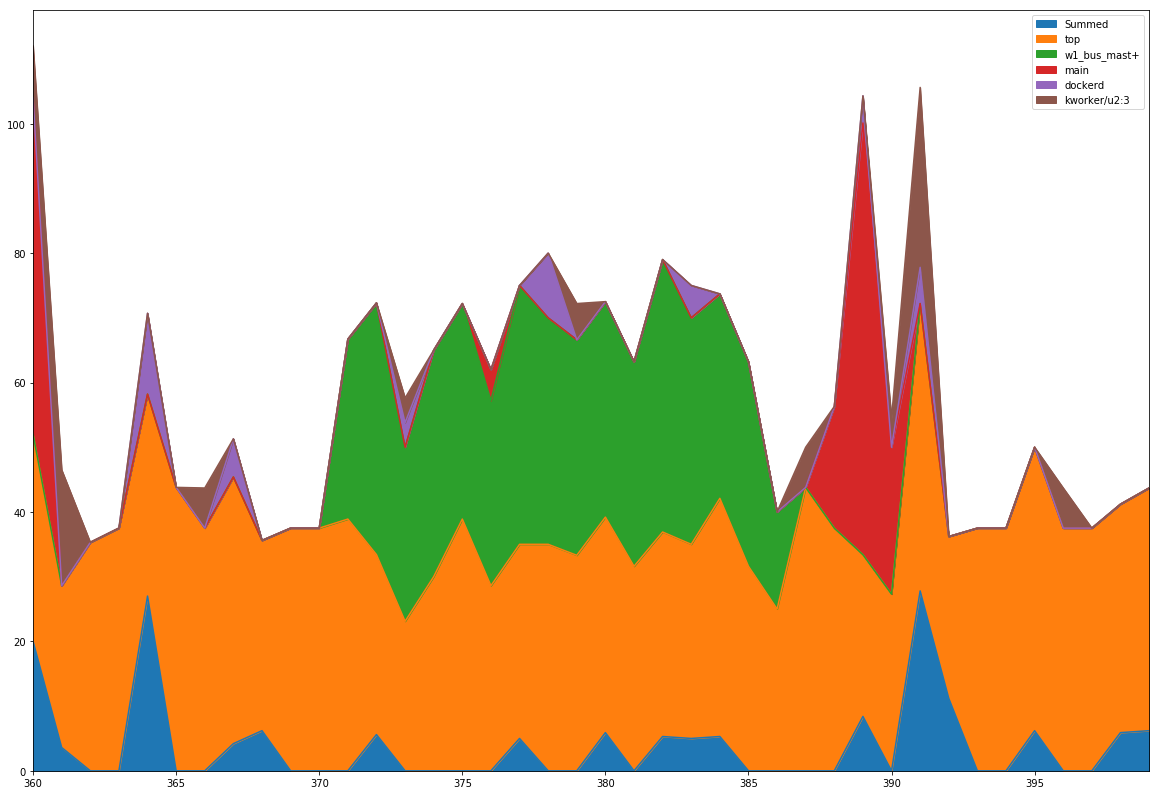

In [12]:
stackplot(cpu, ['top', 'w1_bus_mast+', 'main', 'dockerd', 'kworker/u2:3'])
plt.show()

In [28]:
save_as_csv(cpu_csv, cpu)
save_as_csv(mem_csv, mem)